This notebook will define the fuzzy systems for the following 9 features:
- Left Shin Angle
- Right Shin Angle
- Left Thigh Angle
- Right Thigh Angle
- Torso Angle
- Horizontal Knee Separation
- Foot Separation
- Vertical Shoulder to Hip
- Vertical Hip to Knee

The membership function that defines the correct range of inputs will be designed based on the error values in the training data (relative to the regression models). These error values have already been calculated, therefore all that is needed is to import the error arrays for concentric and eccentric contraction.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
#Import the error arrays
err_con = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Feedback\\Data\\Front Concentric Error.npy')
err_ecc = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Feedback\\Data\\Front Eccentric Error.npy')

#Calculate the mean and standard deviation of the errors for each feature.
err_con_mean = np.round(np.mean(err_con, axis=1),3)
err_con_std = np.round(np.std(err_con, axis=1),3)
err_ecc_mean = np.round(np.mean(err_ecc, axis=1),3)
err_ecc_std = np.round(np.std(err_ecc, axis=1),3)

# change the angular values to degrees
err_con_mean[:5] = np.rad2deg(err_con_mean[:5])
err_con_std[:5] = np.rad2deg(err_con_std[:5])
err_ecc_mean[:5] = np.rad2deg(err_ecc_mean[:5])
err_ecc_std[:5] = np.rad2deg(err_ecc_std[:5])

err_con_std,err_ecc_std

(array([9.68298674, 8.82355005, 6.9900851 , 7.62033868, 3.83881723,
        0.184     , 0.229     , 0.294     , 0.054     ]),
 array([8.9381416 , 8.82355005, 6.47442308, 6.53171886, 3.55233833,
        0.163     , 0.224     , 0.31      , 0.05      ]))

# Initial Membership Function Design
I will initiate the membership functions for all features in the following ways.
### "Correct" membership function design
Based on the above data, the trapezoidal membership functions will be defined as follows:
- Symetrical
- Centre is at the mean
- Flat part finishes at +2*std and -2*std
- Membership function drops to zero at +3*std and -3*std

These are just arbitrary choices, but the reason is that two and three standard deviations capture approximately 95% and 99.7% of the data, respectively. This seems like a good starting point.

### Other membership functions design
Easiest way to define these membership functions is based on the standard deviation of the "correct" data. 
- make the "Medium_neg" and "Medium_pos" functions to overlap the "correct" function by 1 standard deviation of the correct data. 
- make the "Medium_neg" and "Medium_pos" functions have a flat section spanning 2 standard deviations (same as the half of the "correct" function.
- make the "Large_neg" and "Large_pos" overlap the medium functions the same as the medium functions overlaps with the correct function.
- make the Large functions then increase to 0 within 1 standard deviation, then this stays flat until the edge of the range.

This is just an approjimation, the "correct" mambership function will be far more accurate than the other two, but if things need to be changed this can be done later, either manually or algorithm based.

# Improved Membership Function Design
After acquiring some examples showing incorrect technique (I filmed these myself) I have tweaked the membership functions. The membership functions are not quite defined exactly how they were initially defined. The new membership functions are far from optimal, but they do seem to give results that make more sense (at least on the videos that I have acquired).

Now I can proceed to defining the systems

# Inputs for Torso Angle
Express all the angles in degrees, since it is more interpretable to me that the normalised value from 0 to 1 that is is currently.

In [3]:
#Define the number of points that will define the trajectories
N = 10

## Concentric

### Angular Inputs

#### Left Shin

C:\Users\Cian\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


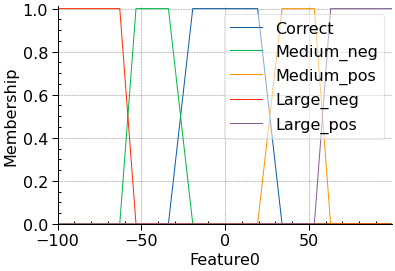

In [4]:
#name the number of the feature that is being analysed
f = 0

#define angular inputs
con0_inputs = {}
for i in range(N):
    con0_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    con0_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con0_inputs[f'Feature{j}'].universe, corr)
    con0_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con0_inputs[f'Feature{j}'].universe, med_neg)
    con0_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con0_inputs[f'Feature{j}'].universe, med_pos)
    con0_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con0_inputs[f'Feature{j}'].universe, lar_neg)
    con0_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con0_inputs[f'Feature{j}'].universe, lar_pos)

con0_inputs['Feature0'].view()

#### Right Shin

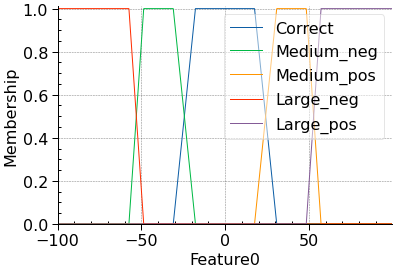

In [5]:
#name the number of the feature that is being analysed
f = 1

#define angular inputs
con1_inputs = {}
for i in range(N):
    con1_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    con1_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con1_inputs[f'Feature{j}'].universe, corr)
    con1_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con1_inputs[f'Feature{j}'].universe, med_neg)
    con1_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con1_inputs[f'Feature{j}'].universe, med_pos)
    con1_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con1_inputs[f'Feature{j}'].universe, lar_neg)
    con1_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con1_inputs[f'Feature{j}'].universe, lar_pos)

con1_inputs['Feature0'].view()

#### Left Thigh

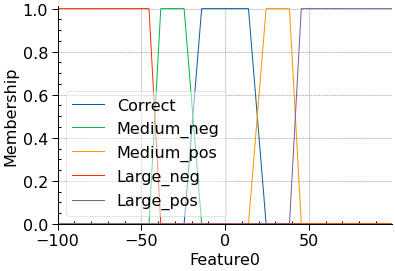

In [6]:
#name the number of the feature that is being analysed
f = 2

#define angular inputs
con2_inputs = {}
for i in range(N):
    con2_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    con2_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con2_inputs[f'Feature{j}'].universe, corr)
    con2_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con2_inputs[f'Feature{j}'].universe, med_neg)
    con2_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con2_inputs[f'Feature{j}'].universe, med_pos)
    con2_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con2_inputs[f'Feature{j}'].universe, lar_neg)
    con2_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con2_inputs[f'Feature{j}'].universe, lar_pos)

con2_inputs['Feature0'].view()

#### Right Thigh

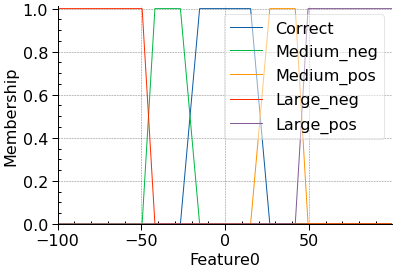

In [7]:
#name the number of the feature that is being analysed
f = 3

#define angular inputs
con3_inputs = {}
for i in range(N):
    con3_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    con3_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con3_inputs[f'Feature{j}'].universe, corr)
    con3_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con3_inputs[f'Feature{j}'].universe, med_neg)
    con3_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con3_inputs[f'Feature{j}'].universe, med_pos)
    con3_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con3_inputs[f'Feature{j}'].universe, lar_neg)
    con3_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con3_inputs[f'Feature{j}'].universe, lar_pos)

con3_inputs['Feature0'].view()

#### Torso

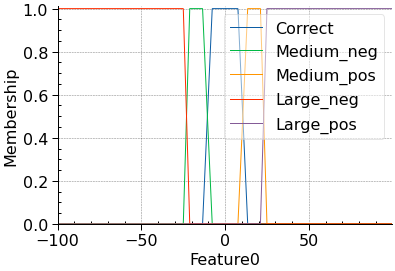

In [8]:
#name the number of the feature that is being analysed
f = 4

#define angular inputs
con4_inputs = {}
for i in range(N):
    con4_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    con4_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con4_inputs[f'Feature{j}'].universe, corr)
    con4_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con4_inputs[f'Feature{j}'].universe, med_neg)
    con4_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con4_inputs[f'Feature{j}'].universe, med_pos)
    con4_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con4_inputs[f'Feature{j}'].universe, lar_neg)
    con4_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con4_inputs[f'Feature{j}'].universe, lar_pos)

con4_inputs['Feature0'].view()

### Non-Angular Inputs

#### Knee Horiontal Separation

I need to define the maximum allowable range:
- The knee separation is normalised by the shoulder width.
- Assume that the knee separation is meant to be a minimum of 1 shoulder width and up to 2 times the shoulder width.
- Difficult to tell when the maximum error will occur.
- Let's say that thigh length is comparable to shoulder width, then if the "correct knee separation" is 0 (would never occur), and the person is very flexible with knees completely to their sides, then the error in this case will be 2 shoulder width.
- To be safe, say that this is 2.5.

Therefore range will be [-2.5,2.5]

In [35]:
#name the number of the feature that is being analysed
f = 5

#define angular inputs
con5_inputs = {}
for i in range(N):
    con5_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-2.5,2.5,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-2.5, -2.5, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],2.5,2.5])
    
# now fuzzify each input
for j in range(N):
    con5_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con5_inputs[f'Feature{j}'].universe, corr)
    con5_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con5_inputs[f'Feature{j}'].universe, med_neg)
    con5_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con5_inputs[f'Feature{j}'].universe, med_pos)
    con5_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con5_inputs[f'Feature{j}'].universe, lar_neg)
    con5_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con5_inputs[f'Feature{j}'].universe, lar_pos)

con5_inputs['Feature0'].view()

SyntaxError: invalid syntax (2603941156.py, line 11)

#### Foot Separation

Use very similar argument to the argument done with the knee separation. However, now the leg length is comparable to let's say 3 times the shoulder width.

Therefore the range is [-6,-6]

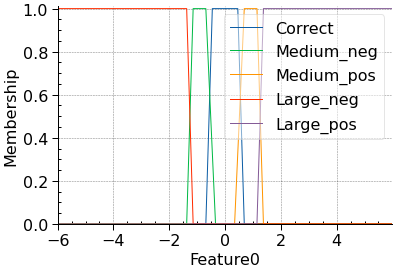

In [10]:
#name the number of the feature that is being analysed
f = 6

#define angular inputs
con6_inputs = {}
for i in range(N):
    con6_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-6,6,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]+0.5*err_con_std[f]])
med_pos = np.array([corr[-2]-0.5*err_con_std[f], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-6, -6, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],6,6])
    
# now fuzzify each input
for j in range(N):
    con6_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con6_inputs[f'Feature{j}'].universe, corr)
    con6_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con6_inputs[f'Feature{j}'].universe, med_neg)
    con6_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con6_inputs[f'Feature{j}'].universe, med_pos)
    con6_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con6_inputs[f'Feature{j}'].universe, lar_neg)
    con6_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con6_inputs[f'Feature{j}'].universe, lar_pos)

con6_inputs['Feature0'].view()

#### Shoulders to Hip Vertical Distance

Again, using a similar argument:
- Approximate, maximum shoulder to hip vert distance (when person is upright) to be twice the shoulder width (this is likely an overestimation).
- The true value could become negative therefore say that the maximum error could be 4.

To be safe, say that the allowable range is [-4,4]

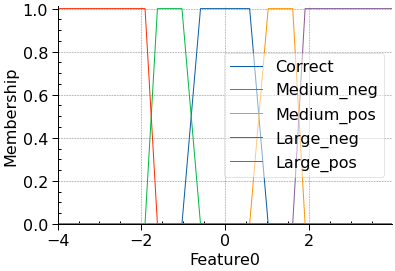

In [11]:
#name the number of the feature that is being analysed
f = 7

#define angular inputs
con7_inputs = {}
for i in range(N):
    con7_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-4,4,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-3.5*err_con_std[f],err_con_mean[f]-2*err_con_std[f], err_con_mean[f]+2*err_con_std[f], err_con_mean[f]+3.5*err_con_std[f]])
med_neg = np.array([corr[0]-3*err_con_std[f], corr[0]-2*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_con_std[f], corr[-1]+3*err_con_std[f]])
lar_neg = np.array([-4, -4, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],4,4])
    
# now fuzzify each input
for j in range(N):
    con7_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con7_inputs[f'Feature{j}'].universe, corr)
    con7_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con7_inputs[f'Feature{j}'].universe, med_neg)
    con7_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con7_inputs[f'Feature{j}'].universe, med_pos)
    con7_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con7_inputs[f'Feature{j}'].universe, lar_neg)
    con7_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con7_inputs[f'Feature{j}'].universe, lar_pos)

con7_inputs['Feature0'].view()

#### Hips to Knees Vertical Distance

In this case we are dealing with the maximum length being the thigh length normalised by the shoulder width, therefore say that it ranges from -2.5 to 2.5 same as for the knee separation.

Allowable range [-2.5,2.5]

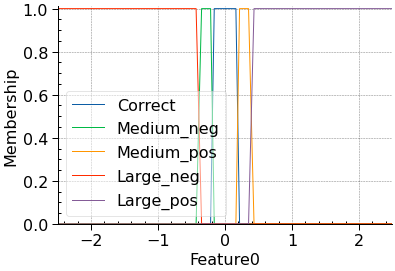

In [12]:
#name the number of the feature that is being analysed
f = 8

#define angular inputs
con8_inputs = {}
for i in range(N):
    con8_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-2.5,2.5,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_con_mean[f]-4*err_con_std[f],err_con_mean[f]-3*err_con_std[f], err_con_mean[f]+3*err_con_std[f], err_con_mean[f]+4*err_con_std[f]])
med_neg = np.array([corr[0]-4*err_con_std[f], corr[0]-2.5*err_con_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2.5*err_con_std[f], corr[-1]+4*err_con_std[f]])
lar_neg = np.array([-2.5, -2.5, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],2.5,2.5])
    
# now fuzzify each input
for j in range(N):
    con8_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(con8_inputs[f'Feature{j}'].universe, corr)
    con8_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(con8_inputs[f'Feature{j}'].universe, med_neg)
    con8_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(con8_inputs[f'Feature{j}'].universe, med_pos)
    con8_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(con8_inputs[f'Feature{j}'].universe, lar_neg)
    con8_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(con8_inputs[f'Feature{j}'].universe, lar_pos)

con8_inputs['Feature0'].view()

## Eccentric

### Angular Inputs

#### Left Shin

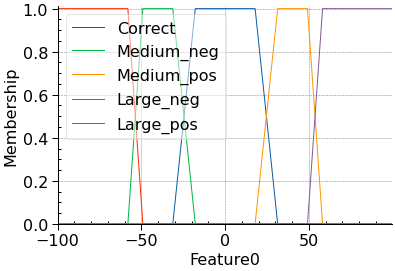

In [13]:
#name the number of the feature that is being analysed
f = 0

#define angular inputs
ecc0_inputs = {}
for i in range(N):
    ecc0_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3.5*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3.5*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    ecc0_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc0_inputs[f'Feature{j}'].universe, corr)
    ecc0_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc0_inputs[f'Feature{j}'].universe, med_neg)
    ecc0_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc0_inputs[f'Feature{j}'].universe, med_pos)
    ecc0_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc0_inputs[f'Feature{j}'].universe, lar_neg)
    ecc0_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc0_inputs[f'Feature{j}'].universe, lar_pos)

ecc0_inputs['Feature0'].view()

#### Right Shin

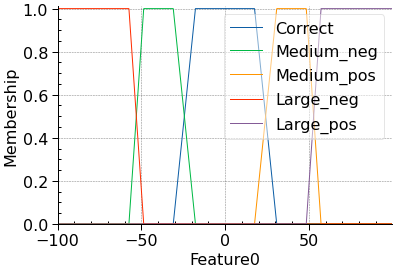

In [14]:
#name the number of the feature that is being analysed
f = 1

#define angular inputs
ecc1_inputs = {}
for i in range(N):
    ecc1_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3.5*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3.5*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    ecc1_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc1_inputs[f'Feature{j}'].universe, corr)
    ecc1_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc1_inputs[f'Feature{j}'].universe, med_neg)
    ecc1_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc1_inputs[f'Feature{j}'].universe, med_pos)
    ecc1_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc1_inputs[f'Feature{j}'].universe, lar_neg)
    ecc1_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc1_inputs[f'Feature{j}'].universe, lar_pos)

ecc1_inputs['Feature0'].view()

#### Left Thigh

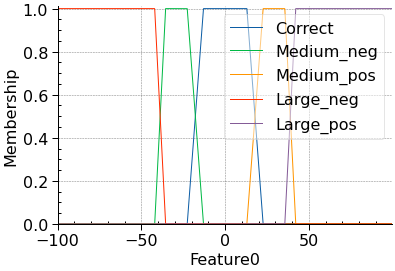

In [15]:
#name the number of the feature that is being analysed
f = 2

#define angular inputs
ecc2_inputs = {}
for i in range(N):
    ecc2_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3.5*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3.5*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    ecc2_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc2_inputs[f'Feature{j}'].universe, corr)
    ecc2_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc2_inputs[f'Feature{j}'].universe, med_neg)
    ecc2_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc2_inputs[f'Feature{j}'].universe, med_pos)
    ecc2_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc2_inputs[f'Feature{j}'].universe, lar_neg)
    ecc2_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc2_inputs[f'Feature{j}'].universe, lar_pos)

ecc2_inputs['Feature0'].view()

#### Right Thigh

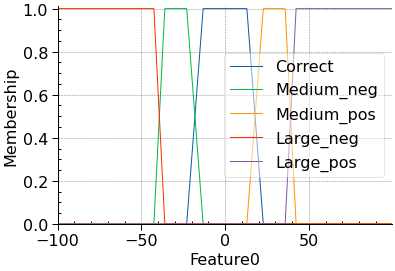

In [16]:
#name the number of the feature that is being analysed
f = 3

#define angular inputs
ecc3_inputs = {}
for i in range(N):
    ecc3_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3.5*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3.5*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    ecc3_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc3_inputs[f'Feature{j}'].universe, corr)
    ecc3_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc3_inputs[f'Feature{j}'].universe, med_neg)
    ecc3_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc3_inputs[f'Feature{j}'].universe, med_pos)
    ecc3_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc3_inputs[f'Feature{j}'].universe, lar_neg)
    ecc3_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc3_inputs[f'Feature{j}'].universe, lar_pos)

ecc3_inputs['Feature0'].view()

#### Torso

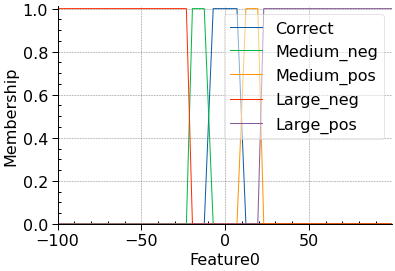

In [17]:
#name the number of the feature that is being analysed
f = 4

#define angular inputs
ecc4_inputs = {}
for i in range(N):
    ecc4_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-100,100,0.1),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3.5*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3.5*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-100, -100, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],100,100])
    
# now fuzzify each input
for j in range(N):
    ecc4_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc4_inputs[f'Feature{j}'].universe, corr)
    ecc4_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc4_inputs[f'Feature{j}'].universe, med_neg)
    ecc4_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc4_inputs[f'Feature{j}'].universe, med_pos)
    ecc4_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc4_inputs[f'Feature{j}'].universe, lar_neg)
    ecc4_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc4_inputs[f'Feature{j}'].universe, lar_pos)

ecc4_inputs['Feature0'].view()

### Non-Angular Inputs

#### Knee Horiontal Separation
Use the same allowable range as was used for the concentric contraction.

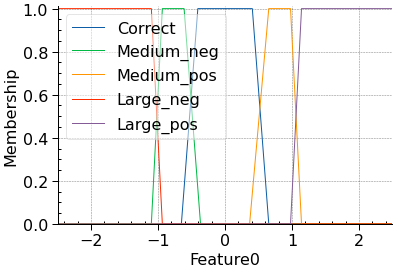

In [18]:
#name the number of the feature that is being analysed
f = 5

#define angular inputs
ecc5_inputs = {}
for i in range(N):
    ecc5_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-2.5,2.5,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-4*err_ecc_std[f],err_ecc_mean[f]-2.5*err_ecc_std[f], err_ecc_mean[f]+2.5*err_ecc_std[f], err_ecc_mean[f]+4*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]]+0.25*err_ecc_std[f])
med_pos = np.array([corr[-2]-0.25*err_ecc_std[f], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-2.5, -2.5, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],2.5,2.5])
    
# now fuzzify each input
for j in range(N):
    ecc5_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc5_inputs[f'Feature{j}'].universe, corr)
    ecc5_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc5_inputs[f'Feature{j}'].universe, med_neg)
    ecc5_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc5_inputs[f'Feature{j}'].universe, med_pos)
    ecc5_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc5_inputs[f'Feature{j}'].universe, lar_neg)
    ecc5_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc5_inputs[f'Feature{j}'].universe, lar_pos)

ecc5_inputs['Feature0'].view()

#### Foot Separation
Same allowable range as concentric

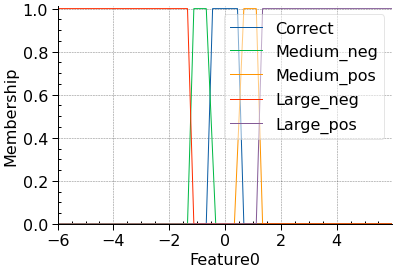

In [19]:
#name the number of the feature that is being analysed
f = 6

#define angular inputs
ecc6_inputs = {}
for i in range(N):
    ecc6_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-6,6,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]+0.5*err_ecc_std[f]])
med_pos = np.array([corr[-2]-0.5*err_ecc_std[f], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-6, -6, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],6,6])
    
# now fuzzify each input
for j in range(N):
    ecc6_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc6_inputs[f'Feature{j}'].universe, corr)
    ecc6_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc6_inputs[f'Feature{j}'].universe, med_neg)
    ecc6_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc6_inputs[f'Feature{j}'].universe, med_pos)
    ecc6_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc6_inputs[f'Feature{j}'].universe, lar_neg)
    ecc6_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc6_inputs[f'Feature{j}'].universe, lar_pos)

ecc6_inputs['Feature0'].view()

#### Shoulders to Hip Vertical Distance
Same allowable range as concentric

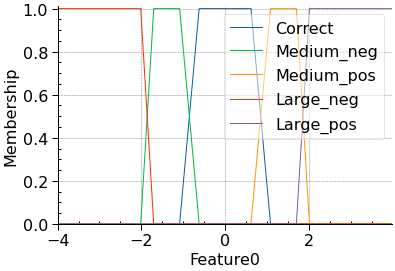

In [20]:
#name the number of the feature that is being analysed
f = 7

#define angular inputs
ecc7_inputs = {}
for i in range(N):
    ecc7_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-4,4,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-3.5*err_ecc_std[f],err_ecc_mean[f]-2*err_ecc_std[f], err_ecc_mean[f]+2*err_ecc_std[f], err_ecc_mean[f]+3.5*err_ecc_std[f]])
med_neg = np.array([corr[0]-3*err_ecc_std[f], corr[0]-2*err_ecc_std[f], corr[0], corr[1]])
med_pos = np.array([corr[-2], corr[-1], corr[-1]+2*err_ecc_std[f], corr[-1]+3*err_ecc_std[f]])
lar_neg = np.array([-4, -4, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],4,4])
    
# now fuzzify each input
for j in range(N):
    ecc7_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc7_inputs[f'Feature{j}'].universe, corr)
    ecc7_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc7_inputs[f'Feature{j}'].universe, med_neg)
    ecc7_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc7_inputs[f'Feature{j}'].universe, med_pos)
    ecc7_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc7_inputs[f'Feature{j}'].universe, lar_neg)
    ecc7_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc7_inputs[f'Feature{j}'].universe, lar_pos)

ecc7_inputs['Feature0'].view()

#### Hips to Knees Vertical Distance

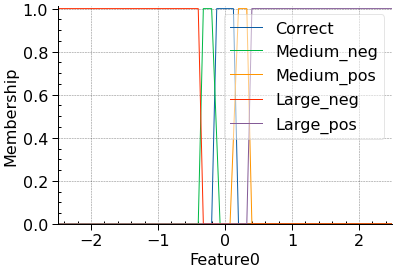

In [21]:
#name the number of the feature that is being analysed
f = 8

#define angular inputs
ecc8_inputs = {}
for i in range(N):
    ecc8_inputs[f'Feature{i}'] = ctrl.Antecedent(np.arange(-2.5,2.5,0.001),f'Feature{i}')
    
#Acquire the values for defining the "correct" membership function
corr = np.array([err_ecc_mean[f]-4*err_ecc_std[f],err_ecc_mean[f]-2.5*err_ecc_std[f], err_ecc_mean[f]+2.5*err_ecc_std[f], err_ecc_mean[f]+4*err_ecc_std[f]])
med_neg = np.array([corr[0]-4*err_ecc_std[f], corr[0]-2.5*err_ecc_std[f], corr[0], corr[1]+1*err_ecc_std[f]])
med_pos = np.array([corr[-2]-1*err_ecc_std[f], corr[-1], corr[-1]+2.5*err_ecc_std[f], corr[-1]+4*err_ecc_std[f]])
lar_neg = np.array([-2.5, -2.5, med_neg[0], med_neg[1]])
lar_pos = np.array([med_pos[-2], med_pos[-1],2.5,2.5])
    
# now fuzzify each input
for j in range(N):
    ecc8_inputs[f'Feature{j}']['Correct'] = fuzz.trapmf(ecc8_inputs[f'Feature{j}'].universe, corr)
    ecc8_inputs[f'Feature{j}']['Medium_neg'] = fuzz.trapmf(ecc8_inputs[f'Feature{j}'].universe, med_neg)
    ecc8_inputs[f'Feature{j}']['Medium_pos'] = fuzz.trapmf(ecc8_inputs[f'Feature{j}'].universe, med_pos)
    ecc8_inputs[f'Feature{j}']['Large_neg'] = fuzz.trapmf(ecc8_inputs[f'Feature{j}'].universe, lar_neg)
    ecc8_inputs[f'Feature{j}']['Large_pos'] = fuzz.trapmf(ecc8_inputs[f'Feature{j}'].universe, lar_pos)

ecc8_inputs['Feature0'].view()

# Next Steps
Next I need to define the:
- time inputs (same as for prototype 2)
- outputs
- logical rules
These will be the exact same for all systems, therefore, it is better to only define them once.

### Time Inputs

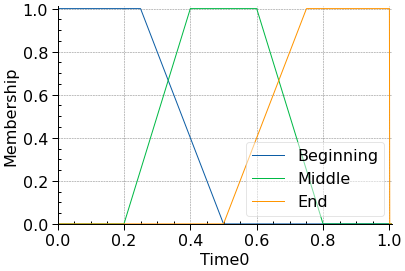

In [22]:
#Identical to what was defined in Prototype 2
t_inputs = {}
for i in range(N):
    t_inputs[f'Time{i}'] = ctrl.Antecedent(np.arange(0,1.01,0.001),f'Time{i}')

#now fuzzify each input
for j in range(N):
    t_inputs[f'Time{j}']['Beginning'] = fuzz.trapmf(t_inputs[f'Time{j}'].universe, [0,0,0.25,0.5])
    t_inputs[f'Time{j}']['Middle'] = fuzz.trapmf(t_inputs[f'Time{j}'].universe, [0.2,0.4,0.6,0.8])
    t_inputs[f'Time{j}']['End'] = fuzz.trapmf(t_inputs[f'Time{j}'].universe, [0.5,0.75,1,1])
    
t_inputs['Time0'].view()

### Define Outputs
Note that I have defined the outputs to range between -1.5 and 1.5. The reason for this is because in order for the output to range between -1 and 1 the centroid of the membership functions at both extremes must be equal to -1 and 1.

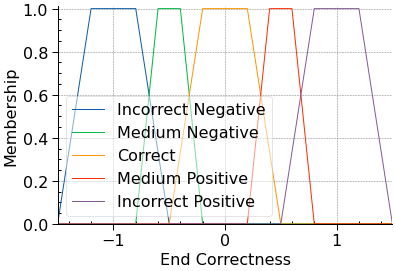

In [23]:
#Identical to what was defined in Prototype 2

beg_corr = ctrl.Consequent(np.arange(-1.5, 1.51, 0.01), 'Beginning Correctness')
mid_corr = ctrl.Consequent(np.arange(-1.5, 1.51, 0.01), 'Middle Correctness')
end_corr = ctrl.Consequent(np.arange(-1.5, 1.51, 0.01), 'End Correctness')

#Now define its membership functions for beginning
beg_corr['Incorrect Negative'] = fuzz.trapmf(beg_corr.universe,[-1.5,-1.2,-0.8,-0.5])
beg_corr['Medium Negative'] = fuzz.trapmf(beg_corr.universe,[-0.8,-0.6,-0.4,-0.2])
beg_corr['Correct'] = fuzz.trapmf(beg_corr.universe,[-0.5,-0.2,0.2,0.5])
beg_corr['Medium Positive'] = fuzz.trapmf(beg_corr.universe,[0.2,0.4,0.6,0.8])
beg_corr['Incorrect Positive'] = fuzz.trapmf(beg_corr.universe,[0.5,0.8,1.2,1.5])

#Now define its membership functions for middle
mid_corr['Incorrect Negative'] = fuzz.trapmf(mid_corr.universe,[-1.5,-1.2,-0.8,-0.5])
mid_corr['Medium Negative'] = fuzz.trapmf(mid_corr.universe,[-0.8,-0.6,-0.4,-0.2])
mid_corr['Correct'] = fuzz.trapmf(mid_corr.universe,[-0.5,-0.2,0.2,0.5])
mid_corr['Medium Positive'] = fuzz.trapmf(mid_corr.universe,[0.2,0.4,0.6,0.8])
mid_corr['Incorrect Positive'] = fuzz.trapmf(mid_corr.universe,[0.5,0.8,1.2,1.5])

#Now define its membership functions for end
end_corr['Incorrect Negative'] = fuzz.trapmf(end_corr.universe,[-1.5,-1.2,-0.8,-0.5])
end_corr['Medium Negative'] = fuzz.trapmf(end_corr.universe,[-0.8,-0.6,-0.4,-0.2])
end_corr['Correct'] = fuzz.trapmf(end_corr.universe,[-0.5,-0.2,0.2,0.5])
end_corr['Medium Positive'] = fuzz.trapmf(end_corr.universe,[0.2,0.4,0.6,0.8])
end_corr['Incorrect Positive'] = fuzz.trapmf(end_corr.universe,[0.5,0.8,1.2,1.5])

end_corr.view()

### Define Logic-Based Rules
I will define these as a function, so that I can apply it to each feature.

In [24]:
#This function takes in the feature that is being analysed (0 = torso angle; 1 = heel height; 2 = hip to knee vert height).
#This function returns a set of rules that will be used to create each system.
def Rules(feat):        
    #initiallize an empty list that will contain all the rules.
    rules = []

    for i in range(N-1):
        #First identify which of the possible features I am analysing
        #Start with concentric
        if feat == "con0":
            feature = con0_inputs[f'Feature{i}']
            feature_next = con0_inputs[f'Feature{i+1}']
        elif feat == "con1":
            feature = con1_inputs[f'Feature{i}']
            feature_next = con1_inputs[f'Feature{i+1}']
        elif feat == "con2":
            feature = con2_inputs[f'Feature{i}']
            feature_next = con2_inputs[f'Feature{i+1}']
        elif feat == "con3":
            feature = con3_inputs[f'Feature{i}']
            feature_next = con3_inputs[f'Feature{i+1}']
        elif feat == "con4":
            feature = con4_inputs[f'Feature{i}']
            feature_next = con4_inputs[f'Feature{i+1}']
        elif feat == "con5":
            feature = con5_inputs[f'Feature{i}']
            feature_next = con5_inputs[f'Feature{i+1}']
        elif feat == "con6":
            feature = con6_inputs[f'Feature{i}']
            feature_next = con6_inputs[f'Feature{i+1}']
        elif feat == "con7":
            feature = con7_inputs[f'Feature{i}']
            feature_next = con7_inputs[f'Feature{i+1}']
        elif feat == "con8":
            feature = con8_inputs[f'Feature{i}']
            feature_next = con8_inputs[f'Feature{i+1}']
        
        #Now eccentric
        elif feat == "ecc0":
            feature = ecc0_inputs[f'Feature{i}']
            feature_next = ecc0_inputs[f'Feature{i+1}']
        elif feat == "ecc1":
            feature = ecc1_inputs[f'Feature{i}']
            feature_next = ecc1_inputs[f'Feature{i+1}']
        elif feat == "ecc2":
            feature = ecc2_inputs[f'Feature{i}']
            feature_next = ecc2_inputs[f'Feature{i+1}']
        elif feat == "ecc3":
            feature = ecc3_inputs[f'Feature{i}']
            feature_next = ecc3_inputs[f'Feature{i+1}']
        elif feat == "ecc4":
            feature = ecc4_inputs[f'Feature{i}']
            feature_next = ecc4_inputs[f'Feature{i+1}']
        elif feat == "ecc5":
            feature = ecc5_inputs[f'Feature{i}']
            feature_next = ecc5_inputs[f'Feature{i+1}']
        elif feat == "ecc6":
            feature = ecc6_inputs[f'Feature{i}']
            feature_next = ecc6_inputs[f'Feature{i+1}']
        elif feat == "ecc7":
            feature = ecc7_inputs[f'Feature{i}']
            feature_next = ecc7_inputs[f'Feature{i+1}']
        elif feat == "ecc8":
            feature = ecc8_inputs[f'Feature{i}']
            feature_next = ecc8_inputs[f'Feature{i+1}']
            
        #if all points are accurate in the beginning section, then the technique is correct.
        #First apply this to the beginning
        rules.append(ctrl.Rule(feature['Correct']&feature_next['Correct']&t_inputs[f'Time{i}']['Beginning']&t_inputs[f'Time{i+1}']['Beginning'], beg_corr['Correct']))

        #Repeat the above for middle time
        rules.append(ctrl.Rule(feature['Correct']&feature_next['Correct']&t_inputs[f'Time{i}']['Middle']&t_inputs[f'Time{i+1}']['Middle'], mid_corr['Correct']))

        #Same for the end
        rules.append(ctrl.Rule(feature['Correct']&feature_next['Correct']&t_inputs[f'Time{i}']['End']&t_inputs[f'Time{i+1}']['End'], end_corr['Correct']))



        #If one point is showing medium error then the technique should be of medium correctness.
        #First apply this to the beginning
        rules.append(ctrl.Rule((feature['Medium_pos']|feature_next['Medium_pos'])&(t_inputs[f'Time{i}']['Beginning']&t_inputs[f'Time{i+1}']['Beginning']), beg_corr['Medium Positive']))
        rules.append(ctrl.Rule((feature['Medium_neg']|feature_next['Medium_neg'])&(t_inputs[f'Time{i}']['Beginning']&t_inputs[f'Time{i+1}']['Beginning']), beg_corr['Medium Negative']))

        #Now apply to middle
        rules.append(ctrl.Rule((feature['Medium_pos']|feature_next['Medium_pos'])&(t_inputs[f'Time{i}']['Middle']&t_inputs[f'Time{i+1}']['Middle']), mid_corr['Medium Positive']))
        rules.append(ctrl.Rule((feature['Medium_neg']|feature_next['Medium_neg'])&(t_inputs[f'Time{i}']['Middle']&t_inputs[f'Time{i+1}']['Middle']), mid_corr['Medium Negative']))

        #Now apply to end
        rules.append(ctrl.Rule((feature['Medium_pos']|feature_next['Medium_pos'])&(t_inputs[f'Time{i}']['End']&t_inputs[f'Time{i+1}']['End']), end_corr['Medium Positive']))
        rules.append(ctrl.Rule((feature['Medium_neg']|feature_next['Medium_neg'])&(t_inputs[f'Time{i}']['End']&t_inputs[f'Time{i+1}']['End']), end_corr['Medium Negative']))


        #If one point is showing large error then the technique should be of low correctness.
        rules.append(ctrl.Rule((feature['Large_pos']|feature_next['Large_pos'])&(t_inputs[f'Time{i}']['Beginning']&t_inputs[f'Time{i+1}']['Beginning']), beg_corr['Incorrect Positive']))
        rules.append(ctrl.Rule((feature['Large_neg']|feature_next['Large_neg'])&(t_inputs[f'Time{i}']['Beginning']&t_inputs[f'Time{i+1}']['Beginning']), beg_corr['Incorrect Negative']))

        #Now apply to middle
        rules.append(ctrl.Rule((feature['Large_pos']|feature_next['Large_pos'])&(t_inputs[f'Time{i}']['Middle']&t_inputs[f'Time{i+1}']['Middle']), mid_corr['Incorrect Positive']))
        rules.append(ctrl.Rule((feature['Large_neg']|feature_next['Large_neg'])&(t_inputs[f'Time{i}']['Middle']&t_inputs[f'Time{i+1}']['Middle']), mid_corr['Incorrect Negative']))

        #Now apply to end
        rules.append(ctrl.Rule((feature['Large_pos']|feature_next['Large_pos'])&(t_inputs[f'Time{i}']['End']&t_inputs[f'Time{i+1}']['End']), end_corr['Incorrect Positive']))
        rules.append(ctrl.Rule((feature['Large_neg']|feature_next['Large_neg'])&(t_inputs[f'Time{i}']['End']&t_inputs[f'Time{i+1}']['End']), end_corr['Incorrect Negative']))
    
    #return the rules list
    return rules

# Create the Fuzzy Inference Systems

In [25]:
# concentric
sys_con0 = ctrl.ControlSystem(Rules('con0'))
sys_con1 = ctrl.ControlSystem(Rules('con1'))
sys_con2 = ctrl.ControlSystem(Rules('con2'))
sys_con3 = ctrl.ControlSystem(Rules('con3'))
sys_con4 = ctrl.ControlSystem(Rules('con4'))
sys_con5 = ctrl.ControlSystem(Rules('con5'))
sys_con6 = ctrl.ControlSystem(Rules('con6'))
sys_con7 = ctrl.ControlSystem(Rules('con7'))
sys_con8 = ctrl.ControlSystem(Rules('con8'))

#eccentric
sys_ecc0 = ctrl.ControlSystem(Rules('ecc0'))
sys_ecc1 = ctrl.ControlSystem(Rules('ecc1'))
sys_ecc2 = ctrl.ControlSystem(Rules('ecc2'))
sys_ecc3 = ctrl.ControlSystem(Rules('ecc3'))
sys_ecc4 = ctrl.ControlSystem(Rules('ecc4'))
sys_ecc5 = ctrl.ControlSystem(Rules('ecc5'))
sys_ecc6 = ctrl.ControlSystem(Rules('ecc6'))
sys_ecc7 = ctrl.ControlSystem(Rules('ecc7'))
sys_ecc8 = ctrl.ControlSystem(Rules('ecc8'))

In [26]:
CON = [sys_con0, sys_con1, sys_con2, sys_con3, sys_con4, sys_con5, sys_con6, sys_con7, sys_con8]
ECC = [sys_ecc0, sys_ecc1, sys_ecc2, sys_ecc3, sys_ecc4, sys_ecc5, sys_ecc6, sys_ecc7, sys_ecc8]

### Apply System to Real Examples
I will now code a script that uses the classification model and the regression "perfect technique" model to create inputs to the fuzzy logic system. This will complete this section

In [27]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions_Squat import signed_error

In [28]:
# con_err, con_interp, corr_con, ecc_err, ecc_interp, corr_ecc = signed_error(15, "C:\\Users\\Cian\\Downloads\\Squat Vids\\1 (1).mp4")
con_err, con_interp, corr_con, ecc_err, ecc_interp, corr_ecc = signed_error(N, "C:\\Users\\Cian\\Downloads\\front.mp4")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[ 0.6         1.73333333  2.66666667  3.6         5.06666667  6.26666667
  7.8         9.26666667 11.2       ]
Front


In [29]:
con_interp.shape, ecc_interp.shape

((3, 10, 9), (3, 10, 9))

[-45.98858725 -45.40826331 -48.52726033 -51.81491749 -50.84142175
 -42.31716151 -38.08688276 -28.61862889 -19.33851479 -14.3887431 ]
[ -9.47614751 -14.70227787 -20.00439615 -32.47363165 -38.60298824
 -40.74280207 -43.79946221 -46.86223632 -44.88157877 -41.39728051]


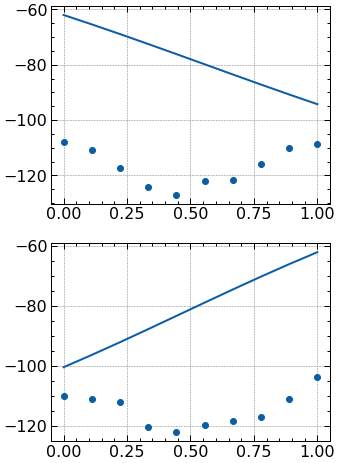

In [34]:
fig, (ax0,ax1) = plt.subplots(2,figsize=(5,8))
t = np.linspace(0,1,N)

rep = 2
feat = 0

if feat<5:
    ax0.scatter(t,con_interp[rep,:,feat]*180/np.pi)
    ax0.plot(t,corr_con[rep,:,feat]*180/np.pi)
    print(con_err[rep,:,feat]*180/np.pi)

    ax1.scatter(t,ecc_interp[rep,:,feat]*180/np.pi)
    ax1.plot(t,corr_ecc[rep,:,feat]*180/np.pi)
    print(ecc_err[rep,:,feat]*180/np.pi)
else:
    ax0.scatter(t,con_interp[rep,:,feat])
    ax0.plot(t,corr_con[rep,:,feat])
    print(con_err[rep,:,feat])

    ax1.scatter(t,ecc_interp[rep,:,feat])
    ax1.plot(t,corr_ecc[rep,:,feat])
    print(ecc_err[rep,:,feat])

In [31]:
simulation = ctrl.ControlSystemSimulation(CON[feat])
T = np.linspace(0,1,N)
for i in range(N):
    if feat<5:
        simulation.input[f'Feature{i}'] = con_err[rep,i,feat]*180/np.pi
    else:   
        simulation.input[f'Feature{i}'] = con_err[rep,i,feat]
    simulation.input[f'Time{i}'] = T[i]
simulation.compute()
np.round(simulation.output['Beginning Correctness'],3), np.round(simulation.output['Middle Correctness'],3), np.round(simulation.output['End Correctness'],3)

(-0.5, -0.5, -0.136)

In [32]:
simulation = ctrl.ControlSystemSimulation(ECC[feat])
T = np.linspace(0,1,N)
for i in range(N):
    if feat<5:
        simulation.input[f'Feature{i}'] = ecc_err[rep,i,feat]*180/np.pi
    else:
        simulation.input[f'Feature{i}'] = ecc_err[rep,i,feat]
    simulation.input[f'Time{i}'] = T[i]
simulation.compute()
np.round(simulation.output['Beginning Correctness'],3), np.round(simulation.output['Middle Correctness'],3), np.round(simulation.output['End Correctness'],3)

(-0.136, -0.5, -0.5)